# Week 4

## Notebook Setup

Load in all of the libraries that we will need.

In [1]:
from collections import Counter 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import tensorflow as tf

%matplotlib inline

To aid readability we will hide any warnings which otherwise would be shown.

In [2]:
import warnings

warnings.filterwarnings('ignore')

Pre-set the seeds for numpy and tensorflow so that our results are reproducible.

In [3]:
np.random.seed(42)
tf.random.set_seed(41)

## Load the Dataset

In [4]:
df = pd.read_csv('Phishing.csv')

## Dataset Exploration

Take a look at the first 10 rows in the dataset.

In [5]:
df.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


Whats the shape of the complete dataset?

In [6]:
df.shape

(11055, 31)

Are there any missing values?

In [7]:
for colname in df.columns:
    print('{:30s}: {}'.format(colname, df[colname].isnull().sum()))

having_IP_Address             : 0
URL_Length                    : 0
Shortining_Service            : 0
having_At_Symbol              : 0
double_slash_redirecting      : 0
Prefix_Suffix                 : 0
having_Sub_Domain             : 0
SSLfinal_State                : 0
Domain_registeration_length   : 0
Favicon                       : 0
port                          : 0
HTTPS_token                   : 0
Request_URL                   : 0
URL_of_Anchor                 : 0
Links_in_tags                 : 0
SFH                           : 0
Submitting_to_email           : 0
Abnormal_URL                  : 0
Redirect                      : 0
on_mouseover                  : 0
RightClick                    : 0
popUpWidnow                   : 0
Iframe                        : 0
age_of_domain                 : 0
DNSRecord                     : 0
web_traffic                   : 0
Page_Rank                     : 0
Google_Index                  : 0
Links_pointing_to_page        : 0
Statistical_re

Doesn't seem to be any.

What are the unique values in the result field?

In [8]:
df['Result'].unique()

array([-1,  1])

Except we can see zero as a value in some of the other columns...

In [9]:
df['having_IP_Address'].unique()

array([-1,  1])

In [10]:
df_sum = df['Result'].value_counts().rename_axis('class').reset_index(name='num_observations')

In [11]:
df_sum

,class,num_observations
0,1,6157
1,-1,4898


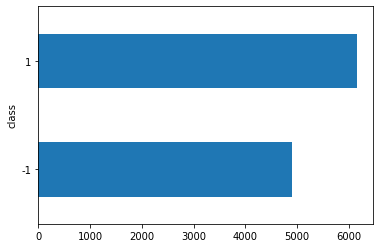

In [12]:
df_sum.groupby('class')['num_observations'].sum().plot(kind='barh');

In [13]:
df.describe(include='all')

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


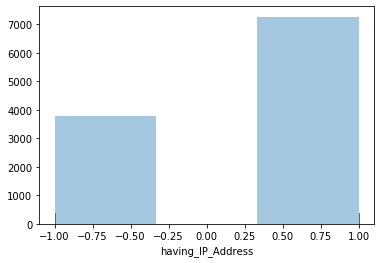

In [14]:
sns.distplot(df['having_IP_Address'], bins=3, kde=False, rug=True);

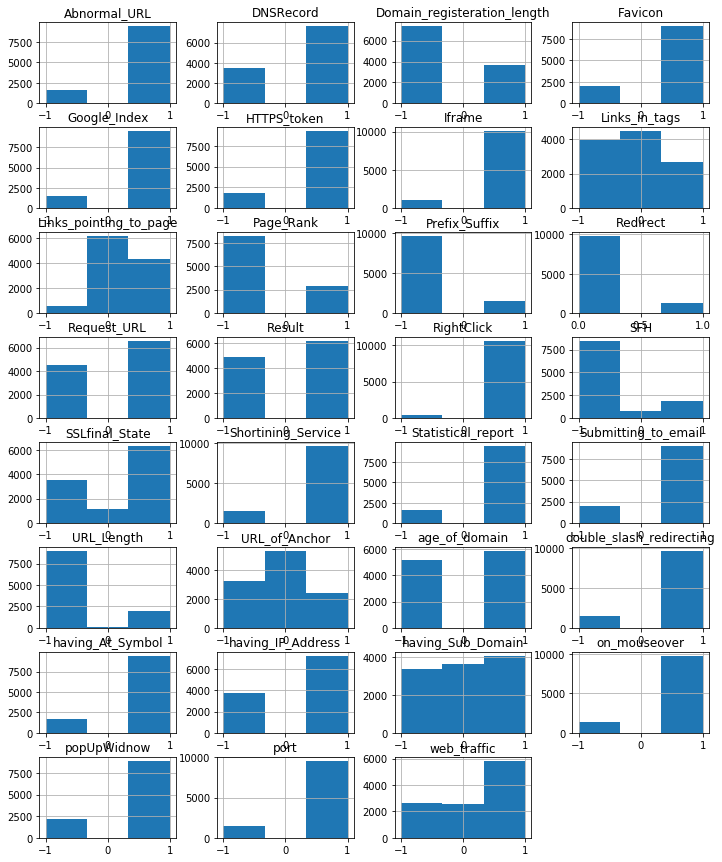

In [15]:
df.hist(bins=3, layout=(8, 4), figsize=(12, 15));

## Clean Up the Data

We saw earlier that some of the data fields hold the values -1, and 1 which are not great for use with machine learning algorithsm. We will update these fields so they are a little more friendly by making the values 0, and 1 instead.

In [16]:
for colname in df.columns: 
    df[colname].replace(value=0, to_replace=-1, inplace=True)

Let's just double check out data looks how we think it should.

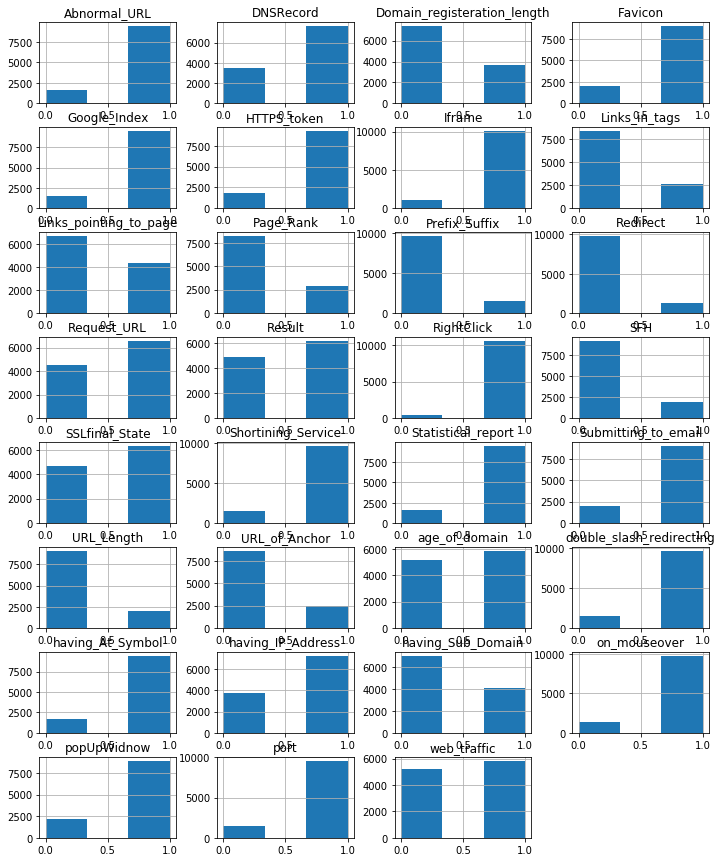

In [17]:
df.hist(bins=3, layout=(8, 4), figsize=(12, 15));

Looks ok now. At least, there's no more -1 values in the dataset.

## Create Test/Train Split

Use a consistent random state to ensure that we get the same test/train split each time we run the code.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df, df.Result, test_size=0.2, random_state=42)

## Perform Logistic Regression

In [19]:
regr = linear_model.LogisticRegression()

Train the model.

In [20]:
regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = regr.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

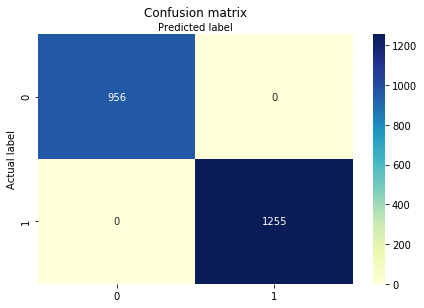

In [22]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 4.75679455e-01 -1.63967102e-02 -2.02568577e-01  1.96435916e-01
   6.07296130e-02  8.95163854e-01  6.88759183e-01  1.64467233e+00
  -1.38994525e-01 -5.71008481e-02  1.09106598e-01 -1.53961767e-01
   2.89274513e-01  9.14020031e-01  2.19055010e-01  4.35885413e-01
  -2.02249554e-02 -1.54575660e-01 -1.77515324e-01  1.11284304e-01
   5.60781826e-02  3.55672591e-04 -5.02677387e-03 -1.77245565e-02
   3.89862838e-01  8.12429933e-01  1.65750954e-01  3.55722987e-01
   4.41663518e-01  2.10473256e-01  1.03434649e+01]]


In [24]:
print('Mean squared error: {:0.2}'.format(mean_squared_error(y_test, y_pred)))

Mean squared error: 0.0


Check the accuracy (1.0 = 'perfect')

In [25]:
print('Accuracy: {:0.2f}'.format(r2_score(y_test, y_pred)))

Accuracy: 1.00


In [26]:
target_names = ['Phishing', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Phishing       1.00      1.00      1.00       956
      Normal       1.00      1.00      1.00      1255

    accuracy                           1.00      2211
   macro avg       1.00      1.00      1.00      2211
weighted avg       1.00      1.00      1.00      2211



In [31]:
penalty = ['l1', 'l2']
C = [0.8, 0.9, 1.0]
tolerances = [0.01, 0.001, 0.0001]
max_iterations = [100, 150, 200, 250]

params = dict(C=C, penalty=penalty, tol=tolerances, max_iter=max_iterations)

lr = linear_model.LogisticRegression(solver='saga', tol=0.0, max_iter=100, random_state=42)
clf = RandomizedSearchCV(lr, params, random_state=42)
search = clf.fit(df, df.Result)
        
print("Best score: {} using {}".format(search.best_score_, search.best_params_))

Best score: 1.0 using {'tol': 0.001, 'penalty': 'l2', 'max_iter': 100, 'C': 0.8}
